<h1>Tilastollisia tunnuslukuja</h1>

Määrällisille muuttujille lasketaan tyypillisesti arvojen lukumäärä, keskiarvo, keskihajonta ja viiden luvun yhteenveto.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Tyyli vaikuttaa grafiikan ulkoasuun
# Käytettävissä olevat tyylit voit listata komennolla plt.style.available
plt.style.use('seaborn-whitegrid')

In [2]:
# Datan avaaminen
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


<h2>describe() laskee tunnusluvut</h2>

In [3]:
# Tunnusluvut kahdella desimaalilla
df.describe().style.format('{:.2f}')

# Vaihtoehdoisesti voin pyöristää round-funktiolla
#df.describe().round(2)

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
count,82.00,82.00,82.00,82.00,81.00,80.00,82.00,82.00,81.00,82.00,82.00,82.00,47.00,20.00,9.00,22.00
mean,41.50,1.23,37.95,1.62,1.99,12.18,2563.88,3.06,4.06,3.22,2.11,3.20,1.00,1.00,1.00,1.00
std,23.82,0.42,9.77,0.49,0.84,8.81,849.35,1.06,0.83,1.15,1.11,1.05,0.00,0.00,0.00,0.00
min,1.00,1.00,20.00,1.00,1.00,0.00,1521.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,21.25,1.00,31.00,1.00,1.00,3.75,2027.00,2.00,4.00,3.00,1.00,3.00,1.00,1.00,1.00,1.00
50%,41.50,1.00,37.50,2.00,2.00,12.50,2320.00,3.00,4.00,3.00,2.00,3.00,1.00,1.00,1.00,1.00
75%,61.75,1.00,44.00,2.00,3.00,18.25,2808.00,4.00,5.00,4.00,3.00,4.00,1.00,1.00,1.00,1.00
max,82.00,2.00,61.00,2.00,4.00,36.00,6278.00,5.00,5.00,5.00,5.00,5.00,1.00,1.00,1.00,1.00


In [4]:
# Tunnuslukuja valituille muuttujille
df[['ikä', 'palveluv', 'palkka']].describe().style.format('{:.2f}')

,ikä,palveluv,palkka
count,82.00,80.00,82.00
mean,37.95,12.18,2563.88
std,9.77,8.81,849.35
min,20.00,0.00,1521.00
25%,31.00,3.75,2027.00
50%,37.50,12.50,2320.00
75%,44.00,18.25,2808.00
max,61.00,36.00,6278.00


In [5]:
# Suomenkieliset nimet tunnusluvuille 
df1 = df[['ikä', 'palveluv', 'palkka']].describe()
df1.index = ['lukumäärä', 'keskiarvo', 'keskihajonta', 'pienin', 'alaneljännes', 'mediaani',
           'yläneljännes', 'suurin']
df1.style.format('{:.2f}')

,ikä,palveluv,palkka
lukumäärä,82.00,80.00,82.00
keskiarvo,37.95,12.18,2563.88
keskihajonta,9.77,8.81,849.35
pienin,20.00,0.00,1521.00
alaneljännes,31.00,3.75,2027.00
mediaani,37.50,12.50,2320.00
yläneljännes,44.00,18.25,2808.00
suurin,61.00,36.00,6278.00


In [6]:
# Yksittäisen tunnusluvun laskenta (tulos ei ole automaattisesti dataframe, siksi to_frame)
df2 = df[['johto', 'työtov', 'työymp', 'palkkat', 'työteht']].mean().to_frame('Keskiarvo')
df2

,Keskiarvo
johto,3.060976
työtov,4.061728
työymp,3.219512
palkkat,2.109756
työteht,3.195122


(1, 5)

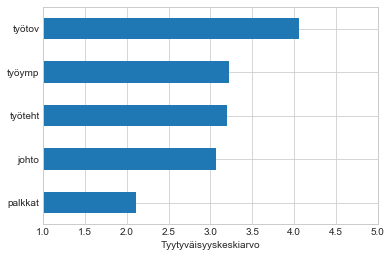

In [7]:
# Edellinen pylväinä keskiarvojen mukaisessa järjestyksessä
ax1 = df2.sort_values('Keskiarvo').plot.barh(legend=False)

ax1.set_xlabel('Tyytyväisyyskeskiarvo')

# Akselin skaalaus 1-5
ax1.set_xlim(1, 5)

<h2>Seaborn-kirjastoa kannattaa hyödyntää</h2>

Lisätietoa ja havainnollisa esimerkkejä barplot- ja boxplot-kaavioista:

https://seaborn.pydata.org/generated/seaborn.barplot.html

https://seaborn.pydata.org/generated/seaborn.boxplot.html

(1, 5)

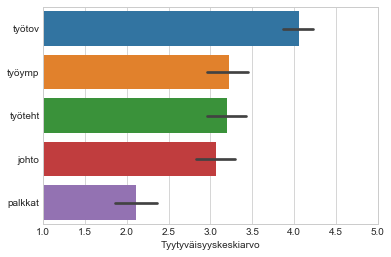

In [8]:
# Tyytyväisyyskeskiarvot seaborn-kirjaston barplot-kaaviona; mukaan tulee myös keskiarvojen virhemarginaalit
# Pelkkä data=df riittää, jos en halua määrittää pylväiden järjestystä
# orien='h' tarkoittaa vaakapylväitä (horizontal)
ax2 = sns.barplot(data=df[['työtov', 'työymp', 'työteht', 'johto', 'palkkat']], orient='h')

ax2.set_xlabel('Tyytyväisyyskeskiarvo')

# Akselin skaalaus 1-5
ax2.set_xlim(1,5)

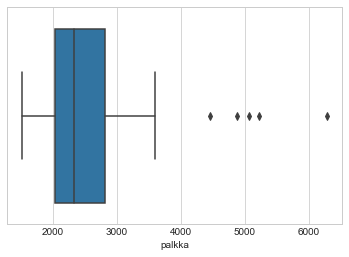

In [9]:
# Viiden luvun yhteenveto (pienin, alaneljännes, mediaani, yläneljännes, suurin) seabornin boxplottina
# Huomattavan paljon muista poikkeavat havainnot erillisinä pisteinä
sns.boxplot(x=df['palkka'])

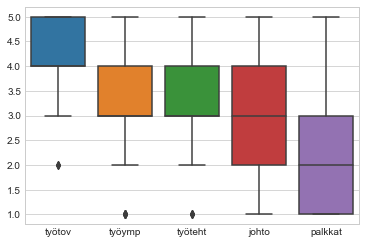

In [10]:
# Viiden luvun yhteenveto tyytyväisyyksistä boxplottina
# data-parametria käyttämällä saat useita muuttujia samaan boxplottiin
sns.boxplot(data=df[['työtov', 'työymp', 'työteht', 'johto', 'palkkat']])